# Introduction:

The Motor Vehicle Collisions crash dataset  (Motor Vehicle Collisions - Crashes, n.d.)
Contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables have information from all police-reported motor vehicle collisions in NYC.

Dataset Dimensions: 

This dataset comprises of 1.83Million records and 29 attributes. To keep it simple, We will be using the first 10,000 records to meet the project requirements.
Attributes Description:
CRASH DATE - Occurrence date of collision - Date & Time 
BOROUGH - Borough where the collision occurred - Plain Text 
ZIP CODE - Postal code of incident occurrence - Plain Text 
LATITUDE - Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) - Number 
LONGITUDE - Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) – Number
 LOCATION - Latitude, Longitude pair - Location 
ON STREET NAME - Street on which the collision occurred - Plain Text 
CROSS STREET NAME - Nearest cross street to the collision - Plain Text 
OFF-STREET NAME - Street address if known - Plain Text 
NUMBER OF PERSONS INJURED - Number of persons injured - Number 
NUMBER OF PERSONS KILLED - Number of persons killed - Number 
NUMBER OF PEDESTRIANS INJURED - Number of pedestrians injured - Number 
NUMBER OF PEDESTRIANS KILLED - Number of dead pedestrians - Number 
NUMBER OF CYCLIST INJURED - Number of cyclists injured - Number 
NUMBER OF cyclists KILLED - Number of dead cyclists - Number 
NUMBER OF MOTORIST INJURED - Number of vehicle occupants injured - Number 
NUMBER OF MOTORIST KILLED - Number of vehicle occupants killed - Number 
CONTRIBUTING FACTOR VEHICLE 1 - Factors contributing to the collision for designated vehicle - Plain Text 
CONTRIBUTING FACTOR VEHICLE 2 - Factors contributing to the collision for selected vehicle - Plain Text 
CONTRIBUTING FACTOR VEHICLE 3 - Factors contributing to the collision for designated vehicle - Plain Text 
CONTRIBUTING FACTOR VEHICLE 4 - Factors contributing to the collision for designated vehicle - Plain Text 
CONTRIBUTING FACTOR VEHICLE 5 - Factors contributing to the collision for designated vehicle - Plain Text 
COLLISION_ID - Unique record code generated by the system. Primary Key for Crash table. - Number 
VEHICLE TYPE CODE 1 - Type of vehicle-based on the selected vehicle category - Plain Text 
VEHICLE TYPE CODE 2 - Type of vehicle based on the selected vehicle category - Plain Text 
VEHICLE TYPE CODE 3 - Type of vehicle based on the selected vehicle category - Plain Text 
VEHICLE TYPE CODE 4 - Type of vehicle-based on the selected vehicle category - Plain Text 

# Exploratory data Ananlysis

### Data Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats as stats
import seaborn as sns
import sklearn.metrics
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_error


In [2]:
#Data Visualizations
def Visualize_Injured_Per_Year(Collision_Data_DF1):
    plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

    # Total number of PERSONS injured
    plt.subplot(4, 2 ,1)
    Collision_Data_DF1.groupby('DATE_YEAR').TOTAL_INJURED.sum().plot.bar()
    plt.title('Total number of PERSONS INJURED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # Total number of MOTORISTS injured
    plt.subplot(4, 2, 2)
    Collision_Data_DF1.groupby('DATE_YEAR').MOTO_INJURED.sum().plot.bar()
    plt.title('Total number of MOTORISTS INJURED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # Total number of CYCLISTS injury
    plt.subplot(4, 2 ,3)
    Collision_Data_DF1.groupby('DATE_YEAR').CYC_INJURED.sum().plot.bar()
    plt.title('Total number of CYCLISTS INJURED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # Total number of PEDESTRIANS injured
    plt.subplot(4, 2, 4)
    Collision_Data_DF1.groupby('DATE_YEAR').PED_INJURED.sum().plot.bar()
    plt.title('Total number of PEDESTRIANS INJURED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    plt.show()
    
def visualize_killed_Per_Year(Collision_Data_DF1):
    
    plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

    # Total number of PERSONS killed
    plt.subplot(4, 2 ,1)
    Collision_Data_DF1.groupby('DATE_YEAR').TOTAL_KILLED.sum().plot.bar()
    plt.title('Total number of PERSONS KILLED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # TTotal number of MOTORISTS killed
    plt.subplot(4, 2, 2)
    Collision_Data_DF1.groupby('DATE_YEAR').MOTO_KILLED.sum().plot.bar()
    plt.title('Total number of MOTORISTS KILLED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # Total number of CYCLISTS killed
    plt.subplot(4, 2 ,3)
    Collision_Data_DF1.groupby('DATE_YEAR').CYC_KILLED.sum().plot.bar()
    plt.title('Total number of CYCLISTS KILLED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    # Total number of PEDESTRIANS killed
    plt.subplot(4, 2, 4)
    Collision_Data_DF1.groupby('DATE_YEAR').PED_KILLED.sum().plot.bar()
    plt.title('Total number of PEDESTRIANS KILLED', fontsize=16)
    plt.xlabel('Year', fontsize=13)

    plt.show()

def Visualize_Borough_Percentage(Collision_Data_DF):
    Collision_Data_DF.BOROUGH.value_counts().plot(kind = 'pie',autopct = '%.2f')
    plt.show()
    
def Visualize_Borough(Collision_Data_DF):
    fig, ax = plt.subplots(1, figsize=(25, 15))

    plt.subplot(2, 2 ,1)
    Collision_Data_DF.groupby('BOROUGH').TOTAL_INJURED.sum().sort_values(ascending=False).plot.bar()
    plt.title('Number of people injured per borough', fontsize=18)
    plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

    plt.subplot(2, 2 ,2)
    Collision_Data_DF.groupby('BOROUGH').TOTAL_KILLED.sum().sort_values(ascending=False).plot.bar()
    plt.title('Number of people killed per borough', fontsize=18)
    plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

    plt.show()
    
#Predictive models
def linear_Model(x, y):
    x=sm.add_constant(x)
    model = sm.OLS(y, x)
    result=model.fit()
    # splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # creating an object of LinearRegression class
    lr = LinearRegression()
    # fitting the training data
    lr.fit(x_train,y_train)
    y_prediction =  lr.predict(x_test)
    return result.params, result.summary(), y_prediction
    

In [3]:
Collision_Data = pd.read_csv("/Users/payyavula/Documents/Bhupal/MPS_Analytics/Spring-2022/Analytical System Technologies/Final_Project/Motor_Vehicle_Collisions_Crashes.csv", sep=',', low_memory=False )

In [4]:
print(Collision_Data)

         CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        04/14/2021       5:32        NaN      NaN        NaN        NaN   
1        04/13/2021      21:35   BROOKLYN    11217  40.683580 -73.976170   
2        04/15/2021      16:15        NaN      NaN        NaN        NaN   
3        04/13/2021      16:00   BROOKLYN    11222        NaN        NaN   
4        04/12/2021       8:25        NaN      NaN   0.000000   0.000000   
...             ...        ...        ...      ...        ...        ...   
1884249  07/06/2012      15:09  MANHATTAN    10035  40.801235 -73.941815   
1884250  07/03/2012      17:30     QUEENS    11102  40.774711 -73.933386   
1884251  07/01/2012      15:30   BROOKLYN    11236  40.645032 -73.919978   
1884252  07/08/2012      18:30        NaN      NaN  40.786122 -73.804078   
1884253  07/05/2012      23:00     QUEENS    11367  40.719910 -73.809039   

                          LOCATION                    ON STREET NAME  \
0              

In [6]:
Collision_Data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [7]:
Collision_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884254 entries, 0 to 1884253
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [8]:
Collision_Data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1665693.00000,1665693.00000,1884236.00000,1884223.00000,1884254.00000,1884254.00000,1884254.00000,1884254.00000,1884254.00000,1884254.00000,1884254.00000
mean,40.66457,-73.81967,0.28601,0.00135,0.05290,0.00069,0.02419,0.00010,0.20740,0.00055,3011825.16523
std,1.55954,3.00848,0.67876,0.03879,0.23630,0.02685,0.15538,0.01004,0.64042,0.02555,1502617.31062
min,0.00000,-201.35999,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,22.00000
25%,40.66836,-73.97536,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3034473.25000
50%,40.72152,-73.92777,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3578314.50000
75%,40.76923,-73.86665,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4049642.75000
max,43.34444,0.00000,43.00000,8.00000,27.00000,6.00000,4.00000,2.00000,43.00000,5.00000,4521068.00000


### Data Cleaning

In [9]:
#Data frame after removing the un wanted rows 
Collision_Data_DF = Collision_Data.drop(["LATITUDE", "ON STREET NAME", "CROSS STREET NAME", "LONGITUDE", "LOCATION", "OFF STREET NAME",  "CONTRIBUTING FACTOR VEHICLE 2", "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5", "VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"], axis =1 )

In [10]:
Collision_Data_DF.rename(columns = {
                       'NUMBER OF PERSONS INJURED'     : 'TOTAL_INJURED',
                       'NUMBER OF PERSONS KILLED'      : 'TOTAL_KILLED',
                       'NUMBER OF PEDESTRIANS INJURED' : 'PED_INJURED',
                       'NUMBER OF PEDESTRIANS KILLED'  : 'PED_KILLED',
                       'NUMBER OF CYCLIST INJURED'     : 'CYC_INJURED',
                       'NUMBER OF CYCLIST KILLED'      : 'CYC_KILLED',
                       'NUMBER OF MOTORIST INJURED'    : 'MOTO_INJURED',
                       'NUMBER OF MOTORIST KILLED'     : 'MOTO_KILLED',
                       'CONTRIBUTING FACTOR VEHICLE 1' : 'VEH_FACTOR_1',
                       'VEHICLE TYPE CODE 1' : 'VEH_TYPE_1',
                       },
           inplace = True) 

In [11]:
Collision_Data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884254 entries, 0 to 1884253
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CRASH DATE     object 
 1   CRASH TIME     object 
 2   BOROUGH        object 
 3   ZIP CODE       object 
 4   TOTAL_INJURED  float64
 5   TOTAL_KILLED   float64
 6   PED_INJURED    int64  
 7   PED_KILLED     int64  
 8   CYC_INJURED    int64  
 9   CYC_KILLED     int64  
 10  MOTO_INJURED   int64  
 11  MOTO_KILLED    int64  
 12  VEH_FACTOR_1   object 
 13  COLLISION_ID   int64  
 14  VEH_TYPE_1     object 
dtypes: float64(2), int64(7), object(6)
memory usage: 215.6+ MB


In [12]:
Collision_Data_DF.isna().sum()

CRASH DATE            0
CRASH TIME            0
BOROUGH          583399
ZIP CODE         583625
TOTAL_INJURED        18
TOTAL_KILLED         31
PED_INJURED           0
PED_KILLED            0
CYC_INJURED           0
CYC_KILLED            0
MOTO_INJURED          0
MOTO_KILLED           0
VEH_FACTOR_1       5580
COLLISION_ID          0
VEH_TYPE_1        10762
dtype: int64

In [13]:
# Borough data of  and Zipcode are missing ~583k records >> ~30% which is significant and we can't disregard it
# I'll assign missing Borough records to NYC. It will be 5 borougs and NYC to collect what's unassigned

# Remove Total Injured and Total Killed NaN values
# TOTAL INJURED and TOTAL KILLED are > 0, otherwise it's just a a record, so let's keep only > 0 records

In [14]:
# Filling  all null values in column Borough
# If a value is NaN it will be NYC
Collision_Data_DF.loc[Collision_Data_DF['BOROUGH'].isnull(), 'BOROUGH'] = 'NYC'

In [15]:
# Remove NaN from TOTAL INJURED
Collision_Data_DF = Collision_Data_DF.dropna(axis=0, subset=['TOTAL_INJURED'])

In [16]:
# Remove NaN from TOTAL KILLED
Collision_Data_DF = Collision_Data_DF.dropna(axis=0, subset=['TOTAL_KILLED'])

In [17]:
# Convert string to DateTime
Collision_Data_DF['CRASH DATE'] = pd.to_datetime(Collision_Data_DF["CRASH DATE"])

In [18]:
# Year filter
Collision_Data_DF['DATE_YEAR'] = pd.to_datetime(Collision_Data_DF['CRASH DATE']).dt.year

In [19]:
Collision_Data_DF = Collision_Data_DF.astype({"TOTAL_INJURED":"int","TOTAL_KILLED":"int"})
#Collision_Data_DF.info()

In [20]:
Collision_Data_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884217 entries, 0 to 1884253
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   CRASH DATE     datetime64[ns]
 1   CRASH TIME     object        
 2   BOROUGH        object        
 3   ZIP CODE       object        
 4   TOTAL_INJURED  int64         
 5   TOTAL_KILLED   int64         
 6   PED_INJURED    int64         
 7   PED_KILLED     int64         
 8   CYC_INJURED    int64         
 9   CYC_KILLED     int64         
 10  MOTO_INJURED   int64         
 11  MOTO_KILLED    int64         
 12  VEH_FACTOR_1   object        
 13  COLLISION_ID   int64         
 14  VEH_TYPE_1     object        
 15  DATE_YEAR      int64         
dtypes: datetime64[ns](1), int64(10), object(5)
memory usage: 244.4+ MB


In [21]:
Collision_Data_DF.isna().sum()

CRASH DATE            0
CRASH TIME            0
BOROUGH               0
ZIP CODE         583614
TOTAL_INJURED         0
TOTAL_KILLED          0
PED_INJURED           0
PED_KILLED            0
CYC_INJURED           0
CYC_KILLED            0
MOTO_INJURED          0
MOTO_KILLED           0
VEH_FACTOR_1       5573
COLLISION_ID          0
VEH_TYPE_1        10757
DATE_YEAR             0
dtype: int64

### Data Visualization

In [22]:
import matplotlib.pyplot as plt

In [23]:
#The data we have is form july 2012 to April 2022, So we can't comapre the 2012 and 2022 with the other years as the data is incomplete and we can't use it in our analysis
# Let's filter out 2012 and  2022
Collision_Data_DF1 = Collision_Data_DF[(Collision_Data_DF['CRASH DATE'] >= '2013-01-01') & (Collision_Data_DF['CRASH DATE'] < '2022-01-01')]


### Injured per year

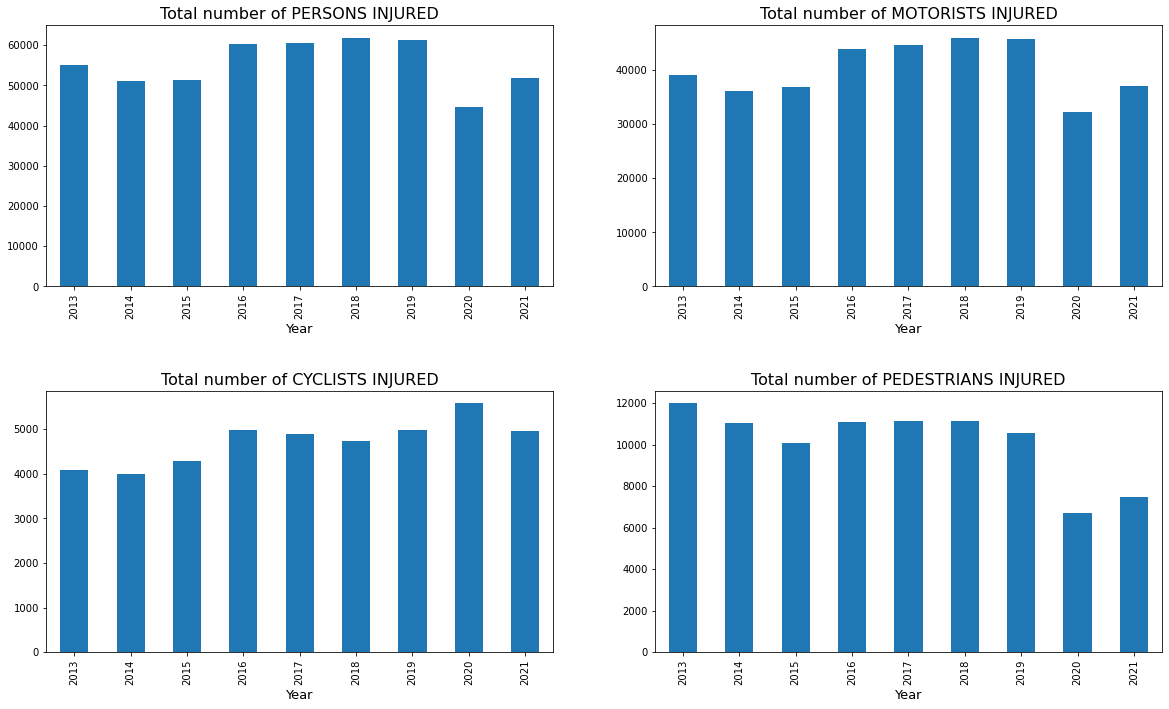

In [24]:
Visualize_Injured_Per_Year(Collision_Data_DF1)

### Killed per year

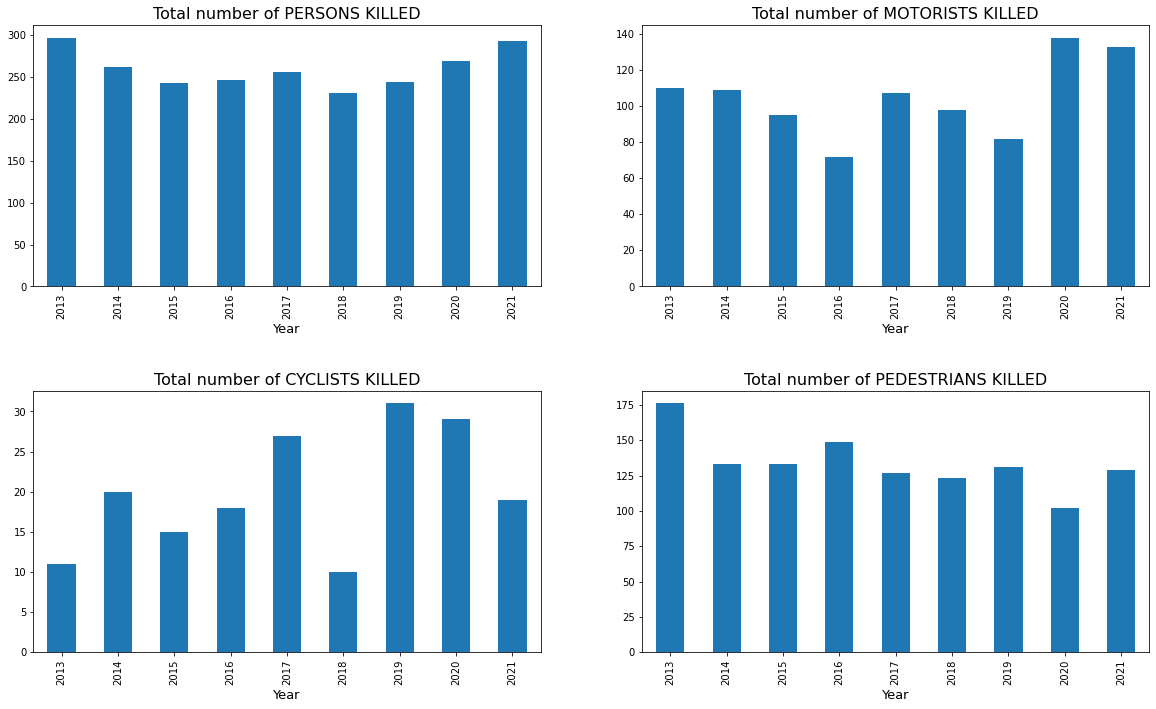

In [25]:
visualize_killed_Per_Year(Collision_Data_DF1)

### Number of people injured/killed per year

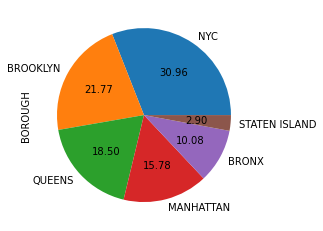

In [26]:
Visualize_Borough_Percentage(Collision_Data_DF)

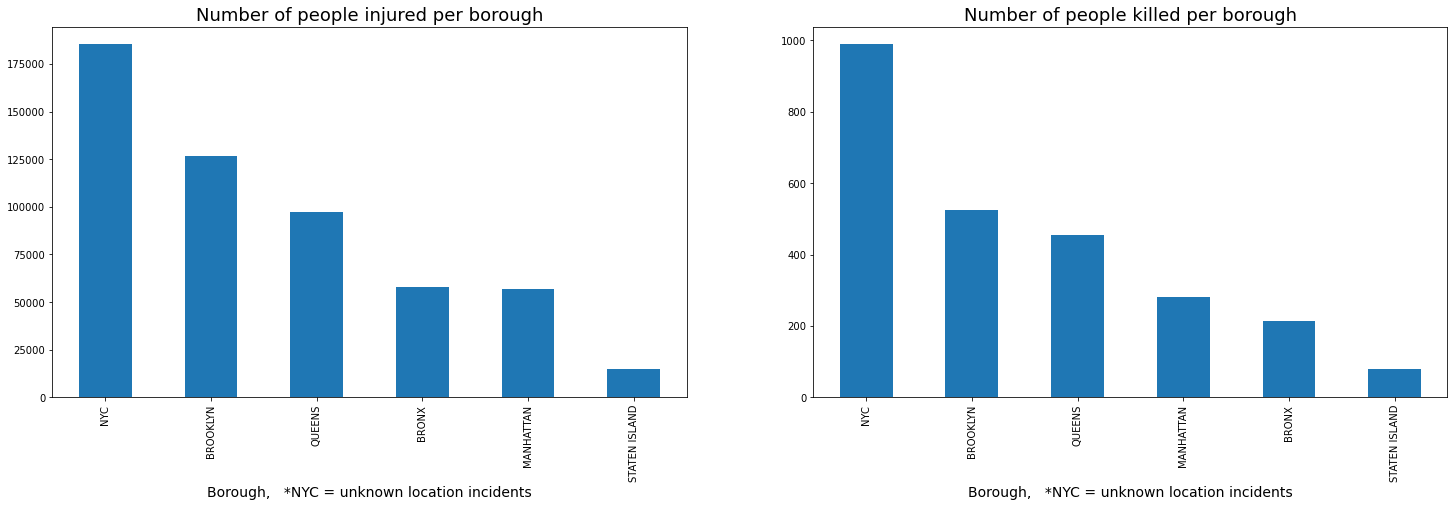

In [27]:
Visualize_Borough(Collision_Data_DF)

# Predictive Models

In [30]:
from sklearn.linear_model import LinearRegression
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#t_test

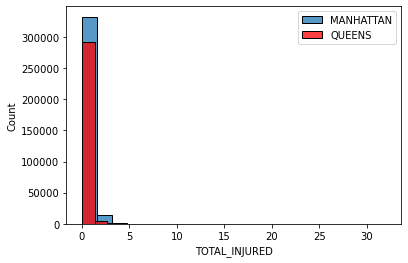

In [32]:
#intall statsmodels by using this command -- (pip install statsmodels)

import statsmodels
import statsmodels.stats as stats
import seaborn as sns

QUEENS = Collision_Data_DF.loc[Collision_Data_DF['BOROUGH']=='QUEENS', 'TOTAL_INJURED']
MANHATTAN = Collision_Data_DF.loc[Collision_Data_DF['BOROUGH']=='MANHATTAN', 'TOTAL_INJURED']

sns.histplot(QUEENS)
sns.histplot(MANHATTAN, color='red')
plt.legend(['MANHATTAN', 'QUEENS'])

#sumamry
# this we will use in t-test and z-test.
#This graph shows Comaparision between Manhattan and queens. which area is more safer because it shows Number of person Injured in that perticular data.

In [33]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(QUEENS, MANHATTAN, alternative='larger')

(59.34610629450688, 0.0, 645905.0)

In [35]:
#linear model

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
x=Collision_Data_DF['TOTAL_INJURED']
y=Collision_Data_DF['TOTAL_KILLED']

In [37]:
linear_Model(x, y)


/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(const            0.001088
 TOTAL_INJURED    0.000913
 dtype: float64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           TOTAL_KILLED   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                     481.2
 Date:                Fri, 20 May 2022   Prob (F-statistic):          1.23e-106
 Time:                        13:29:28   Log-Likelihood:             3.4494e+06
 No. Observations:             1884217   AIC:                        -6.899e+06
 Df Residuals:                 1884215   BIC:                        -6.899e+06
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.9

In [44]:
y = Collision_Data_DF['TOTAL_INJURED'] # dependent variable

x = Collision_Data_DF[['MOTO_INJURED'] ]# independent variable

In [45]:
linear_Model(x, y)

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(const           0.086199
 MOTO_INJURED    0.963350
 dtype: float64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          TOTAL_INJURED   R-squared:                       0.826
 Model:                            OLS   Adj. R-squared:                  0.826
 Method:                 Least Squares   F-statistic:                 8.958e+06
 Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
 Time:                        13:32:57   Log-Likelihood:            -2.9479e+05
 No. Observations:             1884217   AIC:                         5.896e+05
 Df Residuals:                 1884215   BIC:                         5.896e+05
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
#Time Series Analysis

In [46]:
Collision_Data_DF3 = Collision_Data_DF[Collision_Data_DF['TOTAL_INJURED'] > 0]

In [47]:
data = Collision_Data_DF3[['CRASH DATE', 'TOTAL_INJURED' ]]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396483 entries, 1 to 1884250
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CRASH DATE     396483 non-null  datetime64[ns]
 1   TOTAL_INJURED  396483 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.1 MB


In [57]:
data = Collision_Data_DF3[['CRASH DATE', 'TOTAL_INJURED' ]]

In [62]:
data.index = pd.to_datetime(data['CRASH DATE'], format='%Y-%m-%d')

In [64]:
del data['CRASH DATE']

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
sns.set()

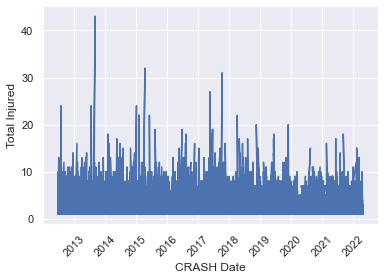

In [68]:
plt.ylabel('Total Injured')
plt.xlabel('CRASH Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['TOTAL_INJURED'], )
plt.show()

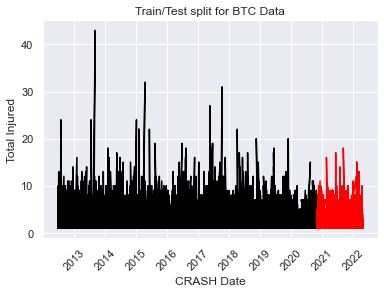

In [69]:
train = data[data.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Total Injured')
plt.xlabel('CRASH Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
y = train['TOTAL_INJURED']

In [73]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date i

In [74]:
ARMAmodel = ARMAmodel.fit()

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27380D+01    |proj g|=  2.75207D+01


 This problem is unconstrained.



At iterate    5    f=  1.51342D+00    |proj g|=  2.27443D-01

At iterate   10    f=  1.35643D+00    |proj g|=  4.61852D-02

At iterate   15    f=  1.29388D+00    |proj g|=  2.99397D-02

At iterate   20    f=  1.28176D+00    |proj g|=  2.68300D-03

At iterate   25    f=  1.27923D+00    |proj g|=  1.09031D-03

At iterate   30    f=  1.27821D+00    |proj g|=  1.34334D-02

At iterate   35    f=  1.27417D+00    |proj g|=  5.92167D-03

At iterate   40    f=  1.27368D+00    |proj g|=  5.58693D-03

At iterate   45    f=  1.27353D+00    |proj g|=  3.86233D-03

At iterate   50    f=  1.27350D+00    |proj g|=  2.59723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


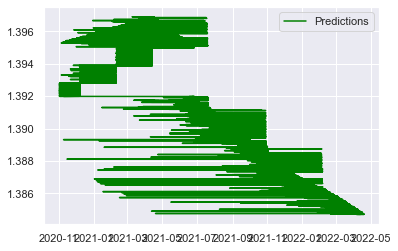

In [76]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

# Interpretation and Conclusion:

Considering all the Visualizations, most people were injured in 2018, and an almost identical number of people were injured in 2016, 2017, 2018, and 2020. The highest number of cyclists were injured in 2020.
The highest number of pedestrians were injured in 2013. The most significant number of people died in 2013 and 2021. 
The highest number of motorists were injured in 2020 and 2021. The highest number of pedestrians were killed in 2013. The highest number of cyclists were killed in 2019 and 2020.
Most people were injured/ killed in Brooklyn, followed by queens. The exact number of people were wounded in queens and Manhattan, but most people died in Manhattan.
 
